# **Automobile Customer Segmentation Classification**

---

## Konten


1. Problem Statement
   * Deskripsi
    * Tujuan
2. Data Understanding
    * Deskripsi Data
    * Import Libraries
    * Load Data
    * Data Preliminary Exploration
3. Data Preparation
    * Data Cleaning
    * Exploratory Data Analysis
4. Data Modeling and Model Evaluation
    * Membagi Data
    * Logistic Regression
    * Support Vector Machines
    * Naive Bayes
    * K-Nearest Neighbors
    * Random Forest
    * XGBoost
5. Model Deployment
6. Conclusion  

# 1. Problem Statement

## 1.1 Deskripsi
Sebuah perusahaan mobil berencana untuk memasuki pasar baru dengan produk mereka yang sudah ada (P1, P2, P3, P4, dan P5). Setelah melakukan riset pasar yang intensif, mereka menyimpulkan bahwa perilaku pasar baru tersebut serupa dengan pasar yang sudah ada.

Di pasar yang sudah ada, tim penjualan telah mengklasifikasikan semua pelanggan ke dalam 4 segmen (A, B, C, D). Selanjutnya, mereka melakukan pendekatan dan komunikasi yang tersegmentasi untuk setiap segmen pelanggan. Strategi ini telah terbukti sangat berhasil bagi mereka. Mereka berencana untuk menerapkan strategi yang sama untuk pasar baru dan telah mengidentifikasi 2627 pelanggan potensial baru.

## 1.2 Tujuan
Tujuan dari proyek ini adalah untuk mempelajari dan memprediksi kelompok pelanggan baru yang sesuai untuk perusahaan otomotif, sehingga perusahaan dapat menerapkan strategi pemasaran yang terbukti efektif secara spesifik untuk setiap pelanggan dan mencapai kesuksesan yang lebih besar dalam bisnis. Untuk mencapai tujuan ini, kami akan menggunakan Dataset Klasifikasi Segmentasi Pelanggan yang dapat diakses di platform Kaggle.


# 2. Data Understanding

## 2.1 Deskripsi Data
Kita akan menggunakan data 'Train.csv' dan 'Test.csv' untuk mengolah, menganalisa, dan membuat model machine learning klasifikasi pada perusahaan mobil kali ini. Data Ini berisi 10.695 observasi, masing-masing dengan atribut sebagai berikut:

**Kolom:** <br>
**1. ID**       : ID unik pelangggan <br>
**2. Gender**   : Jenis kelamin<br>
**3. Ever_Married** : Status pernikahan <br>
**4. Age** : Umur <br>
**5. Graduated** : Apakah pelanggan seorang sarjana? <br>
**6. Profession** : Profesi <br>
**7. Work_Experience** : Pengalaman kerja <br>
**8. Spending_Score** : Pengeluaran pelanggan  <br>
**9. Family_Size** : Jumlah anggota keluarga pelanggan (termasuk pelanggan) <br>
**10. Var_1** : Kategori yang dianonimkan untuk pelanggan <br>
**11. Segmentation** : Segmen pelanggan <br>

## 2.2 Import Libraries
Pertama-pertama, kita perlu mengimpor library yang kita butuhkan untuk mengolah, menganalisa, membuat model dan mengevaluasi model

In [121]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2.3 Load Data
Lalu kita memasukkan data Walmart.csv ke variabel yang bernama df untuk mempermudah proses pengolahan data dan menampilkan 5 isi data teratasnya

In [122]:
auto_train = pd.read_csv("C:/Users/User/Latihan/Project/Dataset/Train.csv", sep= ",")
auto_test = pd.read_csv("C:/Users/User/Latihan/Project/Dataset/Test.csv", sep= ",")
auto = pd.concat([auto_train,auto_test])

In [123]:
auto.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## 2.4 Data Preliminary Exploration
Kemudian kita akan melakukan data preliminary exploration yang bertujuan untuk memahami karakteristik dan kondisi data yang akan digunakan dalam analisis lebih lanjut. 

In [124]:
# Mengecek baris dan kolom pada data
auto.shape

(10695, 11)

In [125]:
# Melihat informasi pada dataset Walmart.csv
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [126]:
# Menganalisa statistik pada data angka
auto.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [127]:
#Menganalisa statistik pada semua fitur
auto.describe(include="all")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,10695.000000,10695,10505,10695.000000,10593,10533,9597.000000,10695,10247.000000,10587,10695
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,5841,6163,NaN,6570,3318,NaN,6494,NaN,6910,3027
mean,463468.088640,NaN,NaN,43.511828,NaN,NaN,2.619777,NaN,2.844052,NaN,NaN
std,2600.966411,NaN,NaN,16.774158,NaN,NaN,3.390790,NaN,1.536427,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461220.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463451.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465733.500000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [128]:
# Mengecek apakah ada missing value pada setiap kolom?
auto.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [129]:
# Mengecek nilai unik setiap kolom
auto.nunique().sort_values()

Gender                2
Ever_Married          2
Graduated             2
Spending_Score        3
Segmentation          4
Var_1                 7
Profession            9
Family_Size           9
Work_Experience      15
Age                  67
ID                 8363
dtype: int64

In [130]:
# Mengecek berapakah nilai 0 per kolom pada dataset?
(auto==0).sum(axis=0)

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    3087
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
dtype: int64

In [131]:
# Mengecek berapa baris yang terdapat duplikat
auto.duplicated().sum()

38

In [132]:
# Mengecek nilai persentase dari setiap kategori segmentasi (A,B,C,D) untuk klasifikasi
persen_segmen = pd.DataFrame()
persen_segmen["Count"]  = auto["Segmentation"].value_counts()
persen_segmen["Count%"] = auto["Segmentation"].value_counts()/auto.shape[0]*100

persen_segmen

,Count,Count%
D,3027,28.302945
A,2818,26.348761
C,2442,22.833100
B,2408,22.515194


# 3. Data Preparation

## 3.1 Data Cleaning

In [133]:
# Menghapus 38 baris yang terduplikasi pada data
auto.drop_duplicates(inplace=True)

In [134]:
# Mengatasi missing values pada 6 kolom data:
#1. Ever_Married: Isi nilai dengan 'No'
#2. Graduated: Isi nilai dengan 'No'
#3. Profession: menghapus baris jika terdapat missing value
#4. Family_Size: isi nilai dengan rata-rata
#5. Var_1: menghapus baris jika terdapat missing value
#6. Work_Experience: estimate based on Age

auto['Ever_Married'].fillna('No', inplace=True)
auto['Graduated'].fillna('No', inplace=True)
auto.dropna(subset=['Profession'], inplace=True)
auto['Family_Size'].fillna(auto['Family_Size'].mean(), inplace=True)
auto.dropna(subset=['Var_1'], inplace=True)
auto['Work_Experience'].replace(0, np.nan, inplace=True)
auto['Work_Experience'].fillna(auto['Work_Experience'].mean(), inplace=True)

In [135]:
# Menghapus kolom ID karena tidak penting bagi model
auto.drop(['ID'], axis=1, inplace=True)

In [136]:
# Mengubah variabel kategorikal (Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1, Segmentation) menjadi dummy
auto = pd.concat([auto, pd.get_dummies(auto["Gender"], prefix="Gender")], axis=1) # axis=1, Parameter ini menunjukkan bahwa penggabungan dilakukan secara berdampingan (horisontal)
auto = pd.concat([auto, pd.get_dummies(auto["Ever_Married"], prefix="Ever_Married")], axis=1)
auto = pd.concat([auto, pd.get_dummies(auto["Graduated"], prefix="Graduated")], axis=1)
auto = pd.concat([auto, pd.get_dummies(auto["Profession"], prefix="Profession")], axis=1)
auto["Spending_Score_Level"] = auto["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1 #Label encoding, Menambahkan 1 ke setiap nilai hasil indeks untuk menggeser nilai indeks mulai dari 1, bukan 0. Sehingga, nilai "Low" akan menjadi 1, nilai "Average" akan menjadi 2, dan nilai "High" akan menjadi 3.
auto = pd.concat([auto, pd.get_dummies(auto['Var_1'], prefix= 'Var_1')], axis=1)

# Variabel target untuk ML (Label encoding)
auto['Segmentation_Level'] = auto['Segmentation'].apply(lambda x: ['A','B','C','D'].index(x))+1

In [137]:
# Mengubah semua variabel numerik (Age, Work_Experience, Family_Size, Work_Experience_to_Age_Ratio) menjadi kategorik (untuk digunakan saat menganalisis korelasi)
auto["Age_Range"]             = np.where(auto.Age>=60, "60+", np.where(auto.Age>=50, "50-60", np.where(auto.Age>=40, "40-50", np.where(auto.Age>=30, "30-40", np.where(auto.Age>=18, "18-30", "18-")))))
auto["Work_Experience_Range"] = np.where(auto.Work_Experience>=10, "10+", np.where(auto.Work_Experience>=5, "5-10", "0-5"))
auto["Family_Size_Range"]     = np.where(auto.Family_Size>=6, "6+", np.where(auto.Family_Size>=3, "3-6", "0-3")) # np.where(): Digunakan untuk menggantikan nilai berdasarkan kondisi tertentu. Syntax ini digunakan secara bertingkat (nested) untuk mengevaluasi kondisi pada rentang usia tertentu.

In [ ]:
# auto.to_csv("auto_ds_clean.csv")

## 3.2 Exploratory Data Analysis

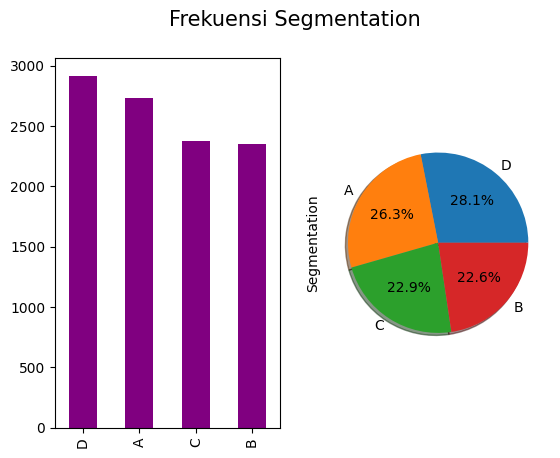

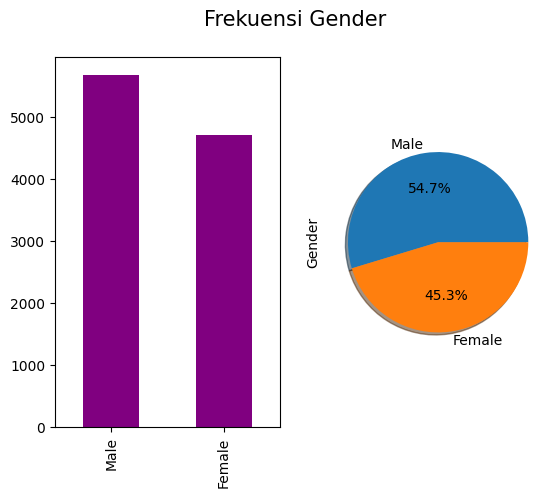

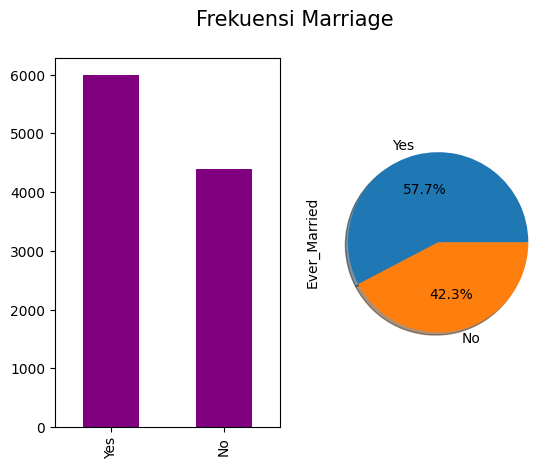

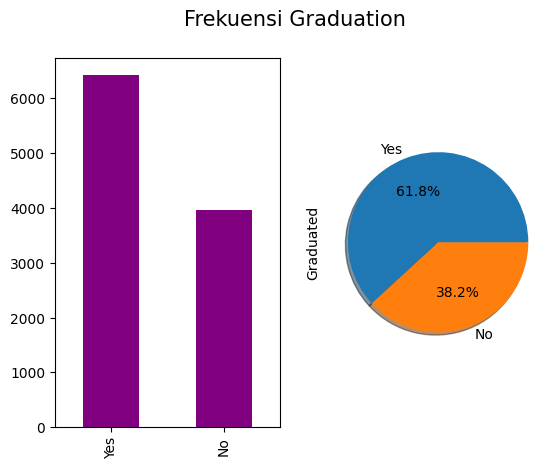

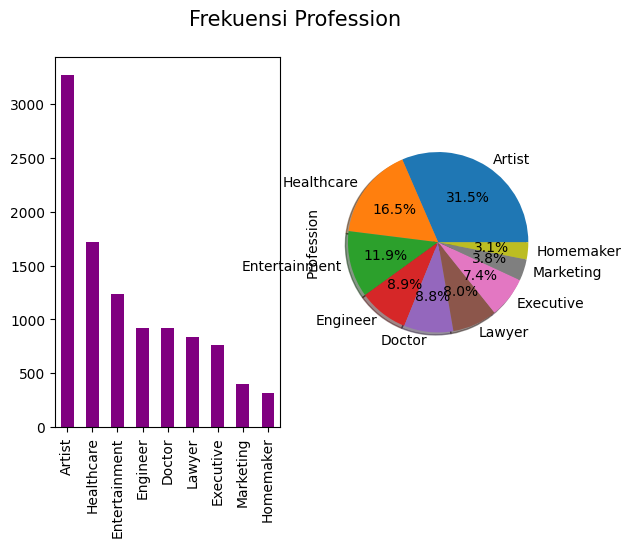

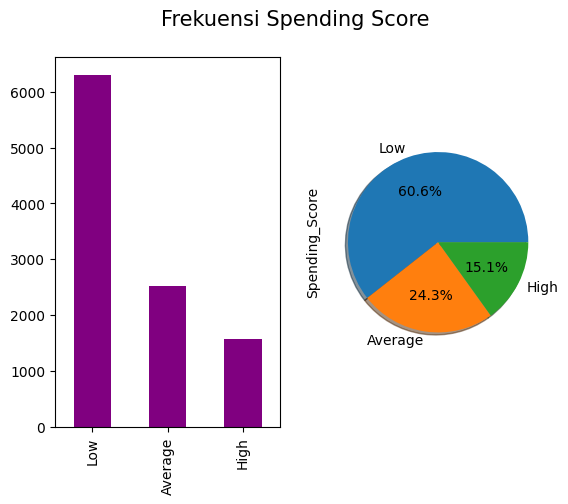

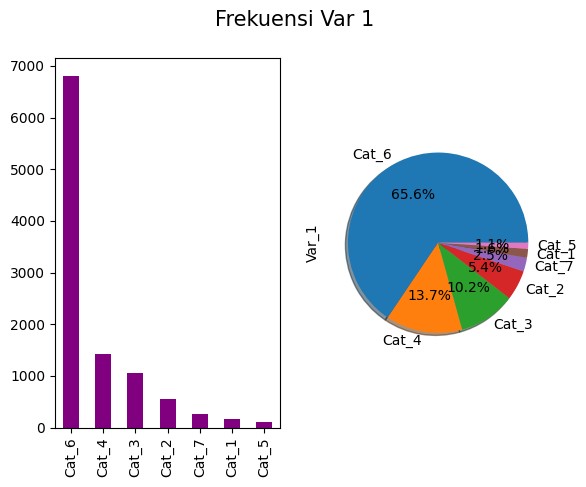

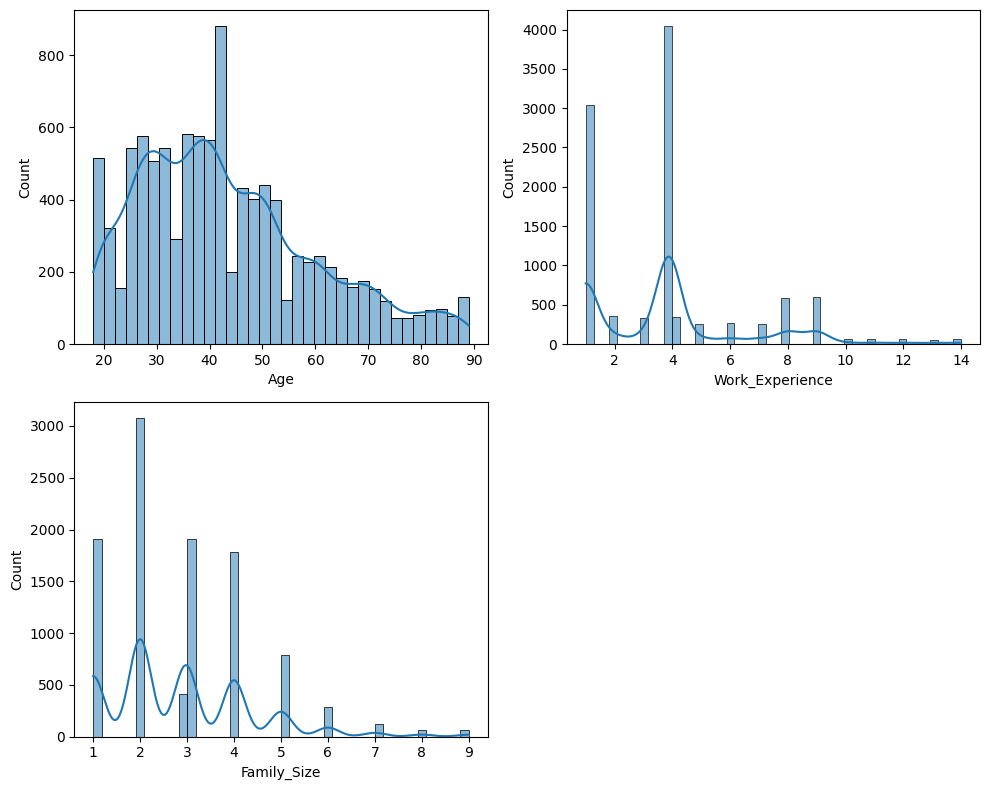

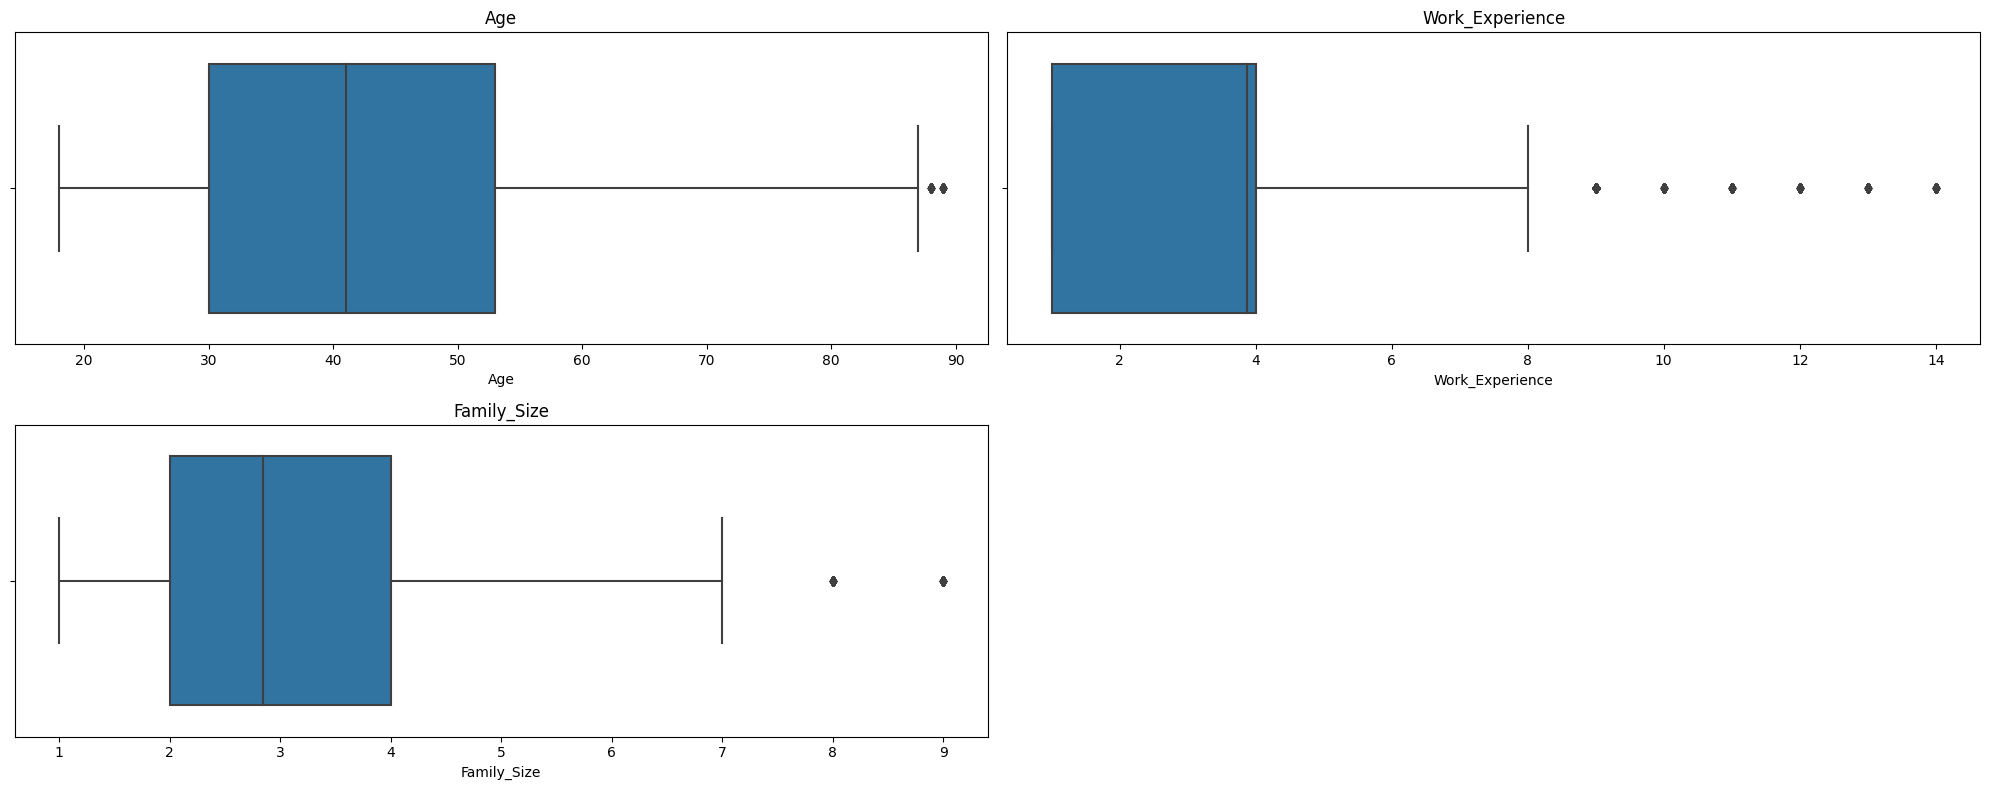

In [138]:
#Plotting Variabel Kategorikal
fig, ax = plt.subplots(1, 2) # Membuat sebuah figure dan dua axes (subplot) dalam satu baris dan dua kolom
auto["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0]) # ax=ax[0] digunakan untuk menentukan bahwa plot ini akan digambar pada axes pertama
auto["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1]) # Parameter autopct digunakan untuk menampilkan persentase pada setiap slice, shadow=True digunakan untuk memberikan efek bayangan pada pie chart, textprops={"fontsize": 10} digunakan untuk mengatur ukuran teks pada slice
fig.suptitle("Frekuensi Segmentation", fontsize=15)
plt.xticks(rotation=90) # Mengatur rotasi label pada sumbu x menjadi 90 derajat agar lebih mudah dibaca
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
auto["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Frekuensi Gender", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
auto["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Frekuensi Marriage", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
auto["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Frekuensi Graduation", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
auto["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Frekuensi Profession", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
auto["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Frekuensi Spending Score", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto["Var_1"].value_counts().plot.bar(color="purple", ax=ax[0])
auto["Var_1"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Frekuensi Var 1", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)


#Plotting Variabel Numerik
# Visualisasi distribusi
columns = ['Age', 'Work_Experience', 'Family_Size']

# Mengatur ukuran frame
plt.figure(figsize=(10, 8)) # Membuat objek gambar dengan ukuran 10x8 inci

# Melakukan iterasi untuk setiap kolom
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1) # 'i+1'memilih subplot yang sesuai berdasarkan nilai  (indeks).
    sns.histplot(auto[column], kde=True) # kde=True digunakan untuk menampilkan kurva estimasi kepadatan kernel di atas histogram.

plt.tight_layout() # Mengatur tata letak subplot agar rapi dan memastikan label tidak tumpang tindih.
plt.show()

# Visualisasi box-plot kolom temperature, fuel price, cpi dan unemployment
columns = ['Age', 'Work_Experience', 'Family_Size']

# Mengatur ukuran frame
plt.figure(figsize=(20, 8))

# Melakukan iterasi untuk setiap kolom
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=auto[column], orient='h')
    plt.title(column)

plt.tight_layout()
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Work_Experience'),
  Text(0, 2.5, 'Family_Size'),
  Text(0, 3.5, 'Gender_Female'),
  Text(0, 4.5, 'Gender_Male'),
  Text(0, 5.5, 'Ever_Married_No'),
  Text(0, 6.5, 'Ever_Married_Yes'),
  Text(0, 7.5, 'Graduated_No'),
  Text(0, 8.5, 'Graduated_Yes'),
  Text(0, 9.5, 'Profession_Artist'),
  Text(0, 10.5, 'Profession_Doctor'),
  Text(0, 11.5, 'Profession_Engineer'),
  Text(0, 12.5, 'Profession_Entertainment'),
  Text(0, 13.5, 'Profession_Executive'),
  Text(0, 14.5, 'Profession_Healthcare'),
  Text(0, 15.5, 'Profession_Homemaker'),
  Text(0, 16.5, 'Profession_Lawyer'),
  Text(0, 17.5, 'Profession_Marketing'),
  Text(0, 18.5, 'Spending_Score_Level'),
  Text(0, 19.5, 'Var_1_Cat_1'),
  Text(0, 20.5, 'Var_1_Cat_2'),
  Text(0, 21.5, 'Var_1_Cat_3'),
  Text(0, 22.5, 'Var_1_

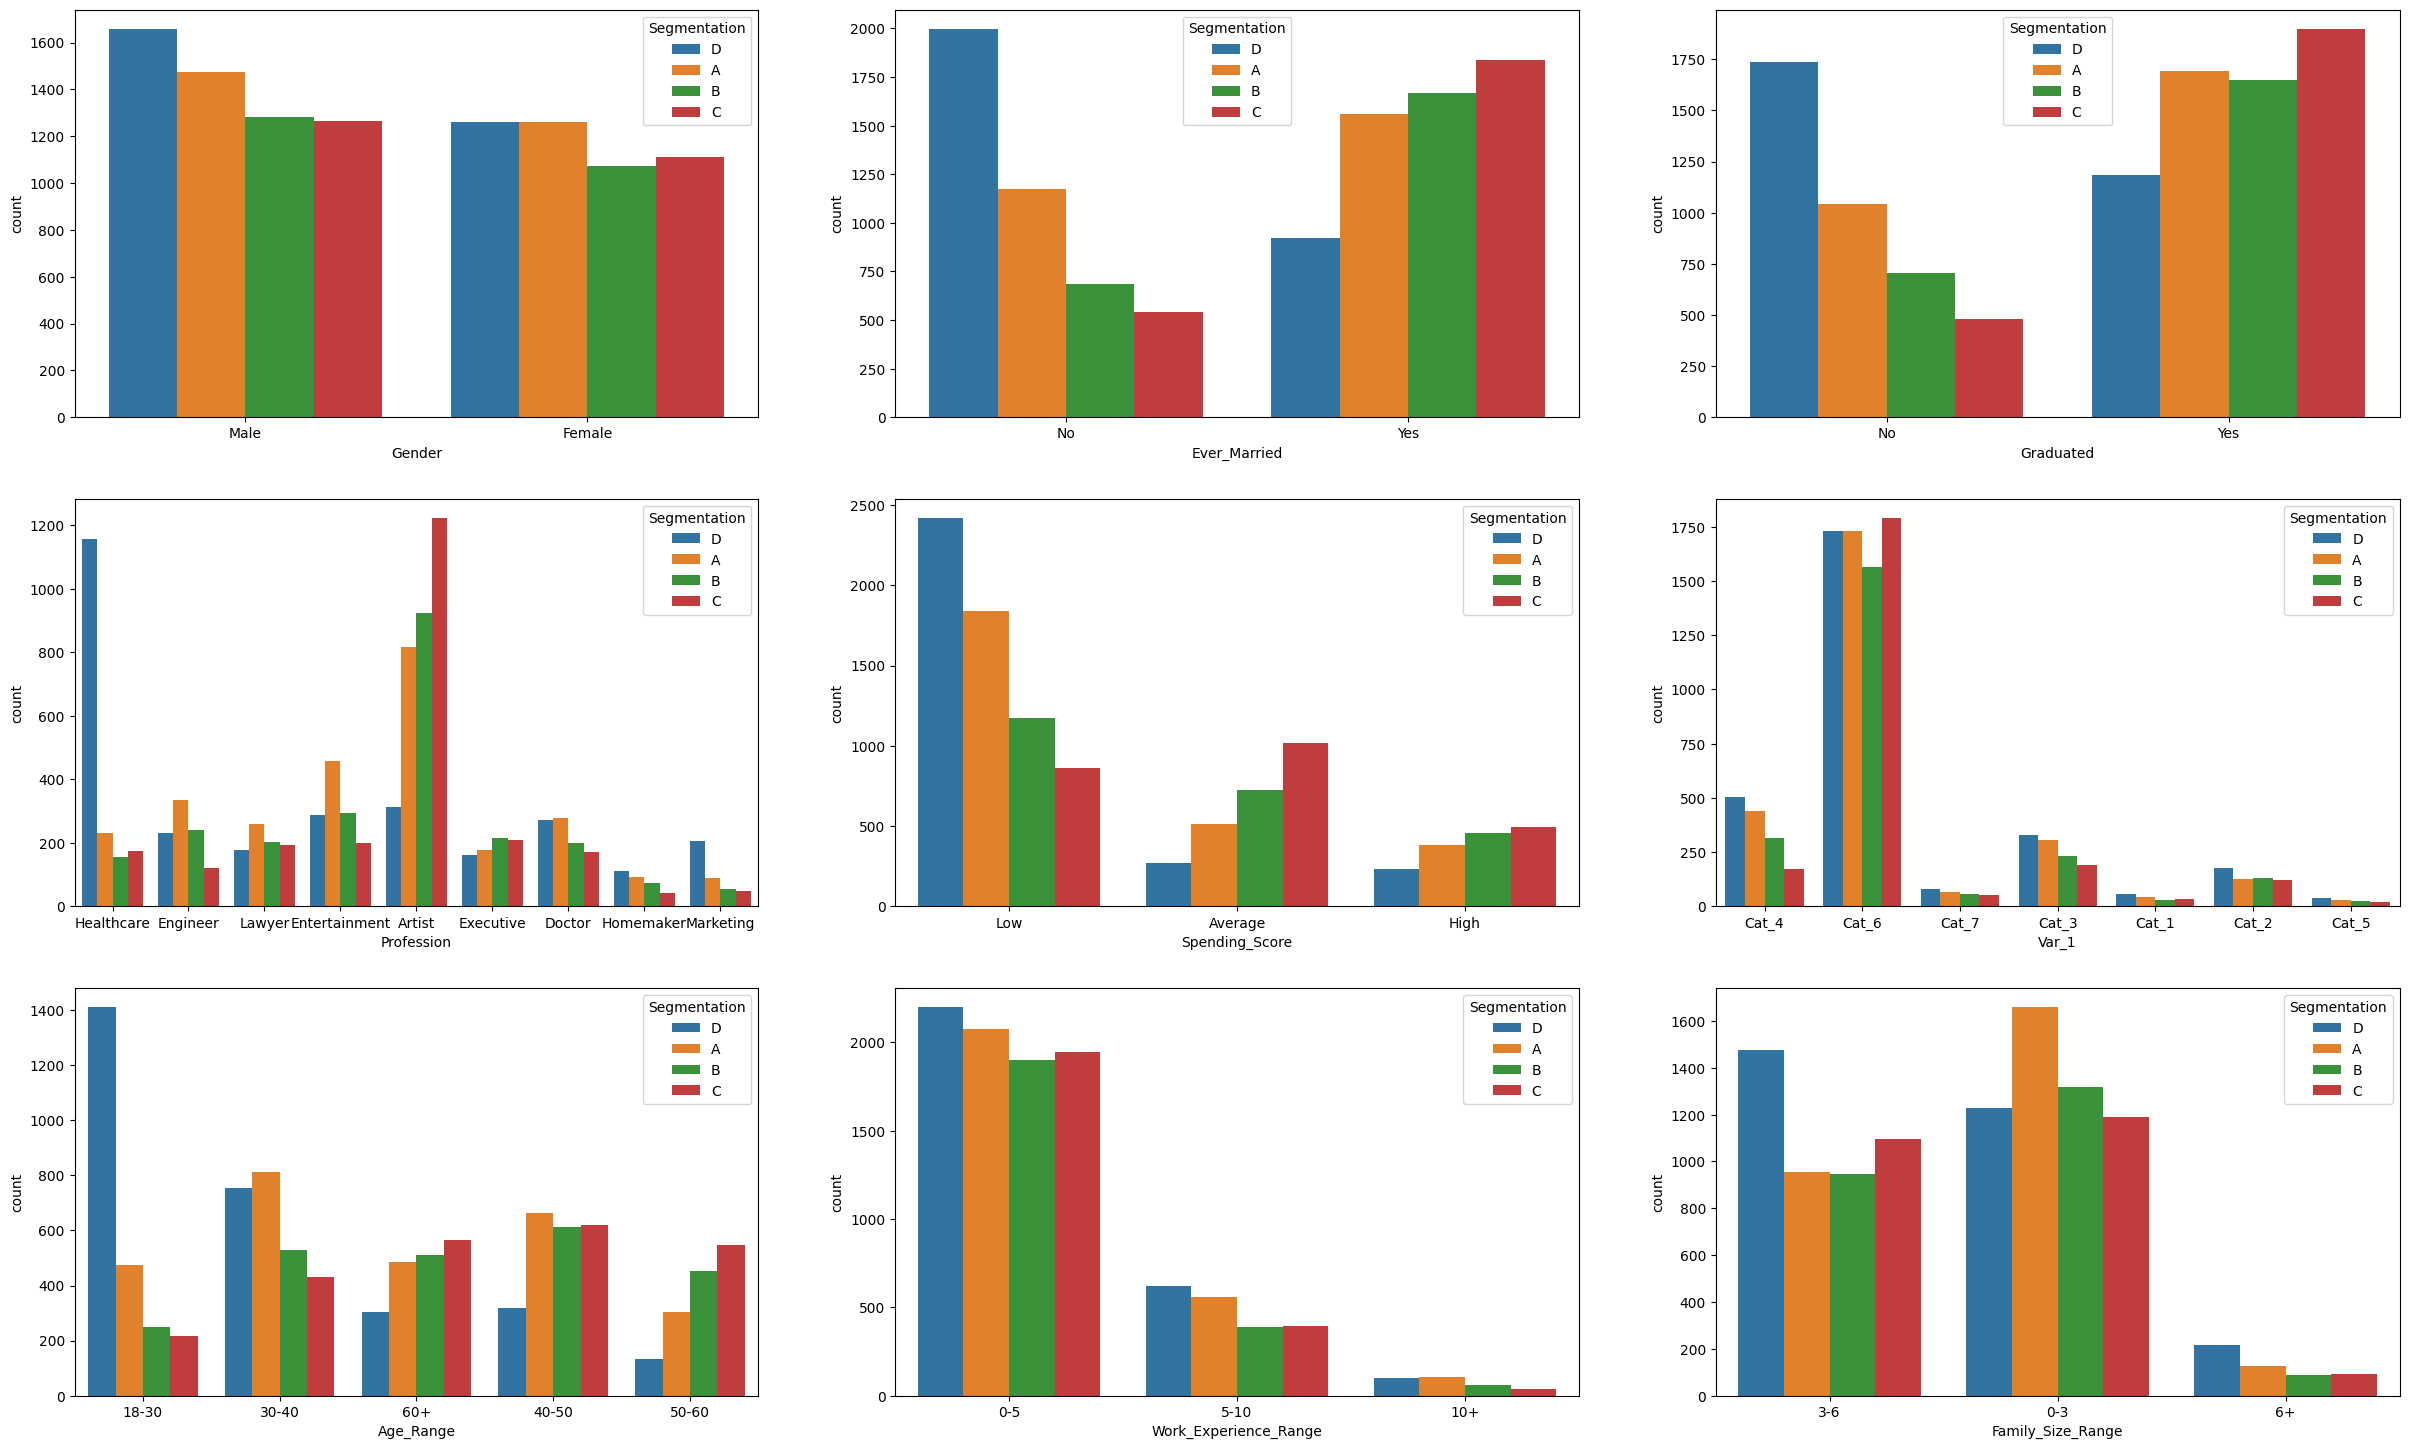

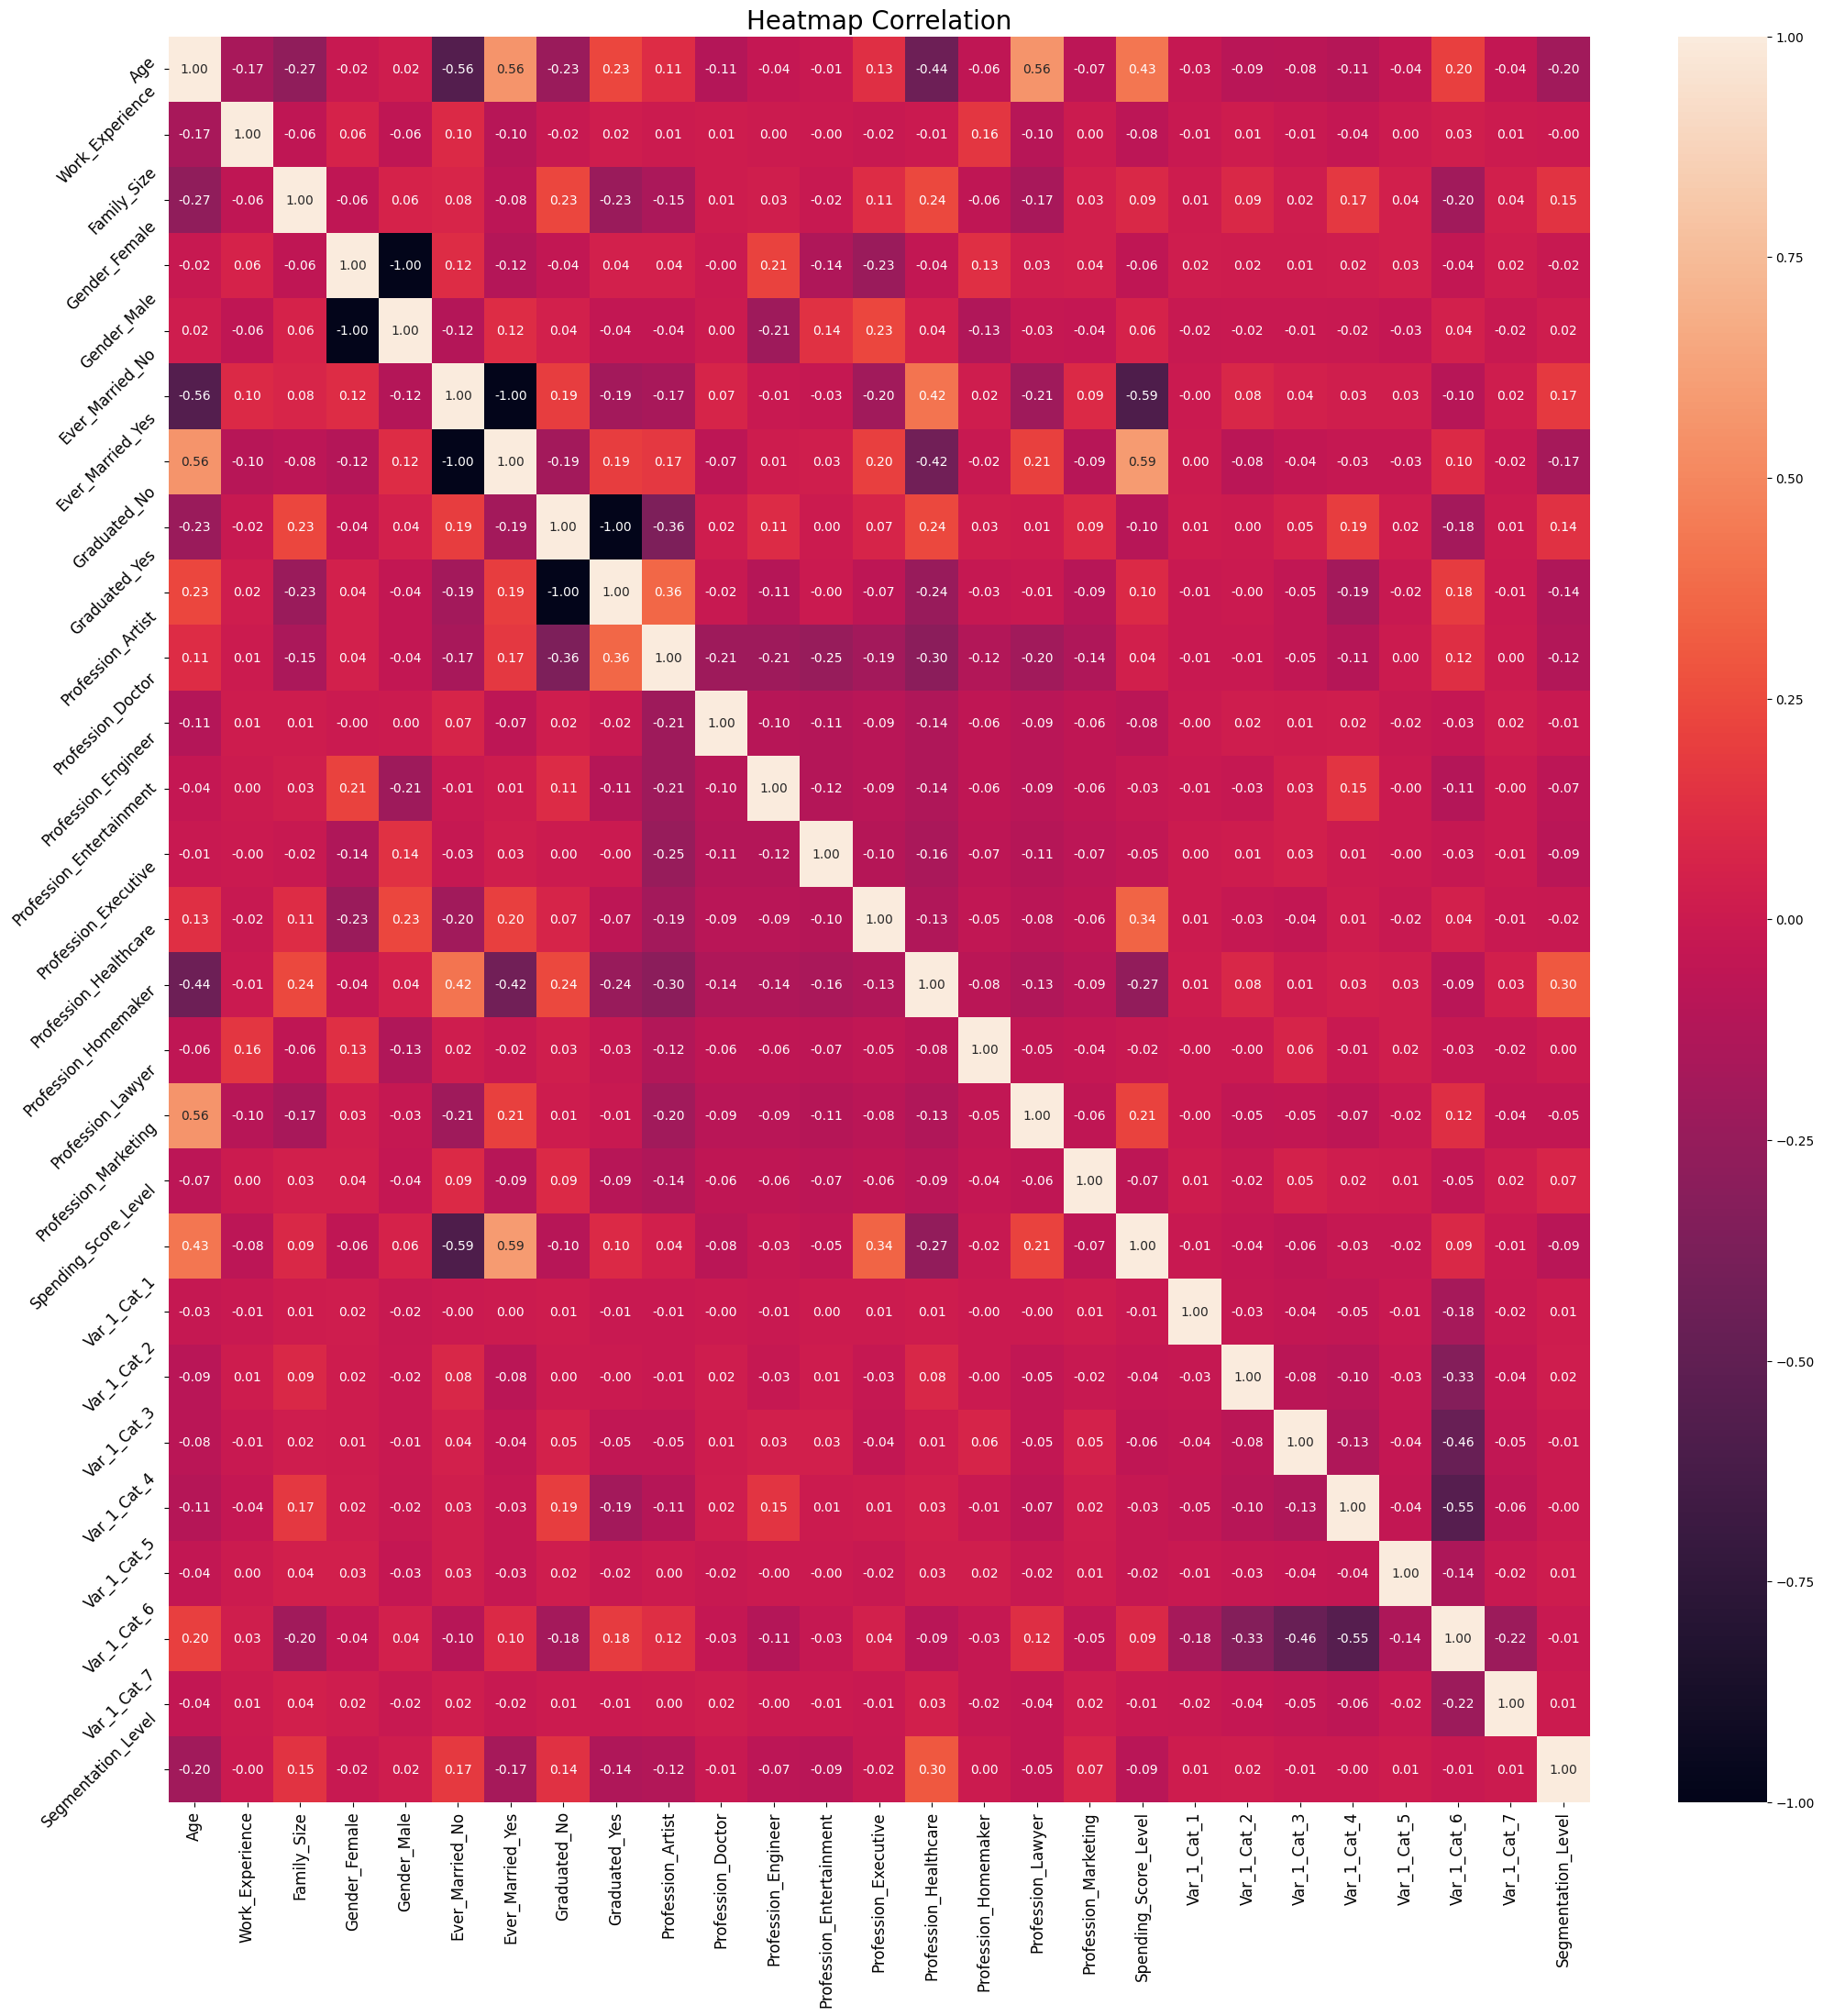

In [139]:
#Memplotting beberapa kolom terhadap segmentasi
fig, axarr = plt.subplots(3, 3, figsize=(30, 18)) #  Membuat objek gambar dengan tata letak subplot 4x3 dan ukuran gambar 30x18 inci. Variabel axarr akan berisi array dari subplot yang dibuat.
sns.countplot(x="Gender",                hue = "Segmentation", data = auto, ax=axarr[0][0]) # Membuat count plot dengan sumbu x adalah "Gender" dan warna berdasarkan "Segmentation" dari data yang ada pada auto. Plot tersebut akan ditampilkan pada subplot di baris pertama dan kolom pertama (axarr[0][0]).
sns.countplot(x="Ever_Married",          hue = "Segmentation", data = auto, ax=axarr[0][1])
sns.countplot(x="Graduated",             hue = "Segmentation", data = auto, ax=axarr[0][2])
sns.countplot(x="Profession",            hue = "Segmentation", data = auto, ax=axarr[1][0])
sns.countplot(x="Spending_Score",        hue = "Segmentation", data = auto, ax=axarr[1][1])
sns.countplot(x="Var_1",                 hue = "Segmentation", data = auto, ax=axarr[1][2])
sns.countplot(x="Age_Range",             hue = "Segmentation", data = auto, ax=axarr[2][0])
sns.countplot(x="Work_Experience_Range", hue = "Segmentation", data = auto, ax=axarr[2][1])
sns.countplot(x="Family_Size_Range",     hue = "Segmentation", data = auto, ax=axarr[2][2])

# Menghapus beberapa kolom pada data asli
auto.drop(["Segmentation", "Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Age_Range",
              "Work_Experience_Range", "Family_Size_Range"], axis=1, inplace=True) # axis=1: Menentukan bahwa operasi penghapusan dilakukan pada sumbu kolom. inplace=True: Mengindikasikan bahwa perubahan harus dilakukan secara langsung pada dataframe auto yang ada, tanpa membuat dataframe baru.

# Memplotting heatmap untuk melihat korelasi antar variabel
fig, ax = plt.subplots(1, figsize=(25,25)) # Menginisialisasi sebuah figure dan axes untuk membuat plot. Dalam hal ini, kita menggunakan 1 axes dengan ukuran figur 25x25.
sns.heatmap(auto.corr(), annot=True, fmt=",.2f") # auto.corr() menghitung matriks korelasi dari dataframe auto, sedangkan annot=True digunakan untuk menampilkan angka korelasi pada heatmap. fmt=",.2f" mengatur format angka dengan dua angka di belakang koma.
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12) # Mengatur ukuran label pada sumbu x dan y dengan ukuran font 12.
plt.xticks(rotation=90)
plt.yticks(rotation=45)

#Plotting a Pairplot
# sns.pairplot(auto)

Feature:Age, Score:0.3979
Feature:Work_Experience, Score:0.1604
Feature:Family_Size, Score:0.1289
Feature:Gender_Female, Score:0.0150
Feature:Gender_Male, Score:0.0153
Feature:Ever_Married_No, Score:0.0162
Feature:Ever_Married_Yes, Score:0.0159
Feature:Graduated_No, Score:0.0151
Feature:Graduated_Yes, Score:0.0119
Feature:Profession_Artist, Score:0.0245
Feature:Profession_Doctor, Score:0.0105
Feature:Profession_Engineer, Score:0.0099
Feature:Profession_Entertainment, Score:0.0117
Feature:Profession_Executive, Score:0.0071
Feature:Profession_Healthcare, Score:0.0248
Feature:Profession_Homemaker, Score:0.0063
Feature:Profession_Lawyer, Score:0.0053
Feature:Profession_Marketing, Score:0.0080
Feature:Spending_Score_Level, Score:0.0414
Feature:Var_1_Cat_1, Score:0.0050
Feature:Var_1_Cat_2, Score:0.0099
Feature:Var_1_Cat_3, Score:0.0146
Feature:Var_1_Cat_4, Score:0.0147
Feature:Var_1_Cat_5, Score:0.0039
Feature:Var_1_Cat_6, Score:0.0193
Feature:Var_1_Cat_7, Score:0.0066


<Axes: >

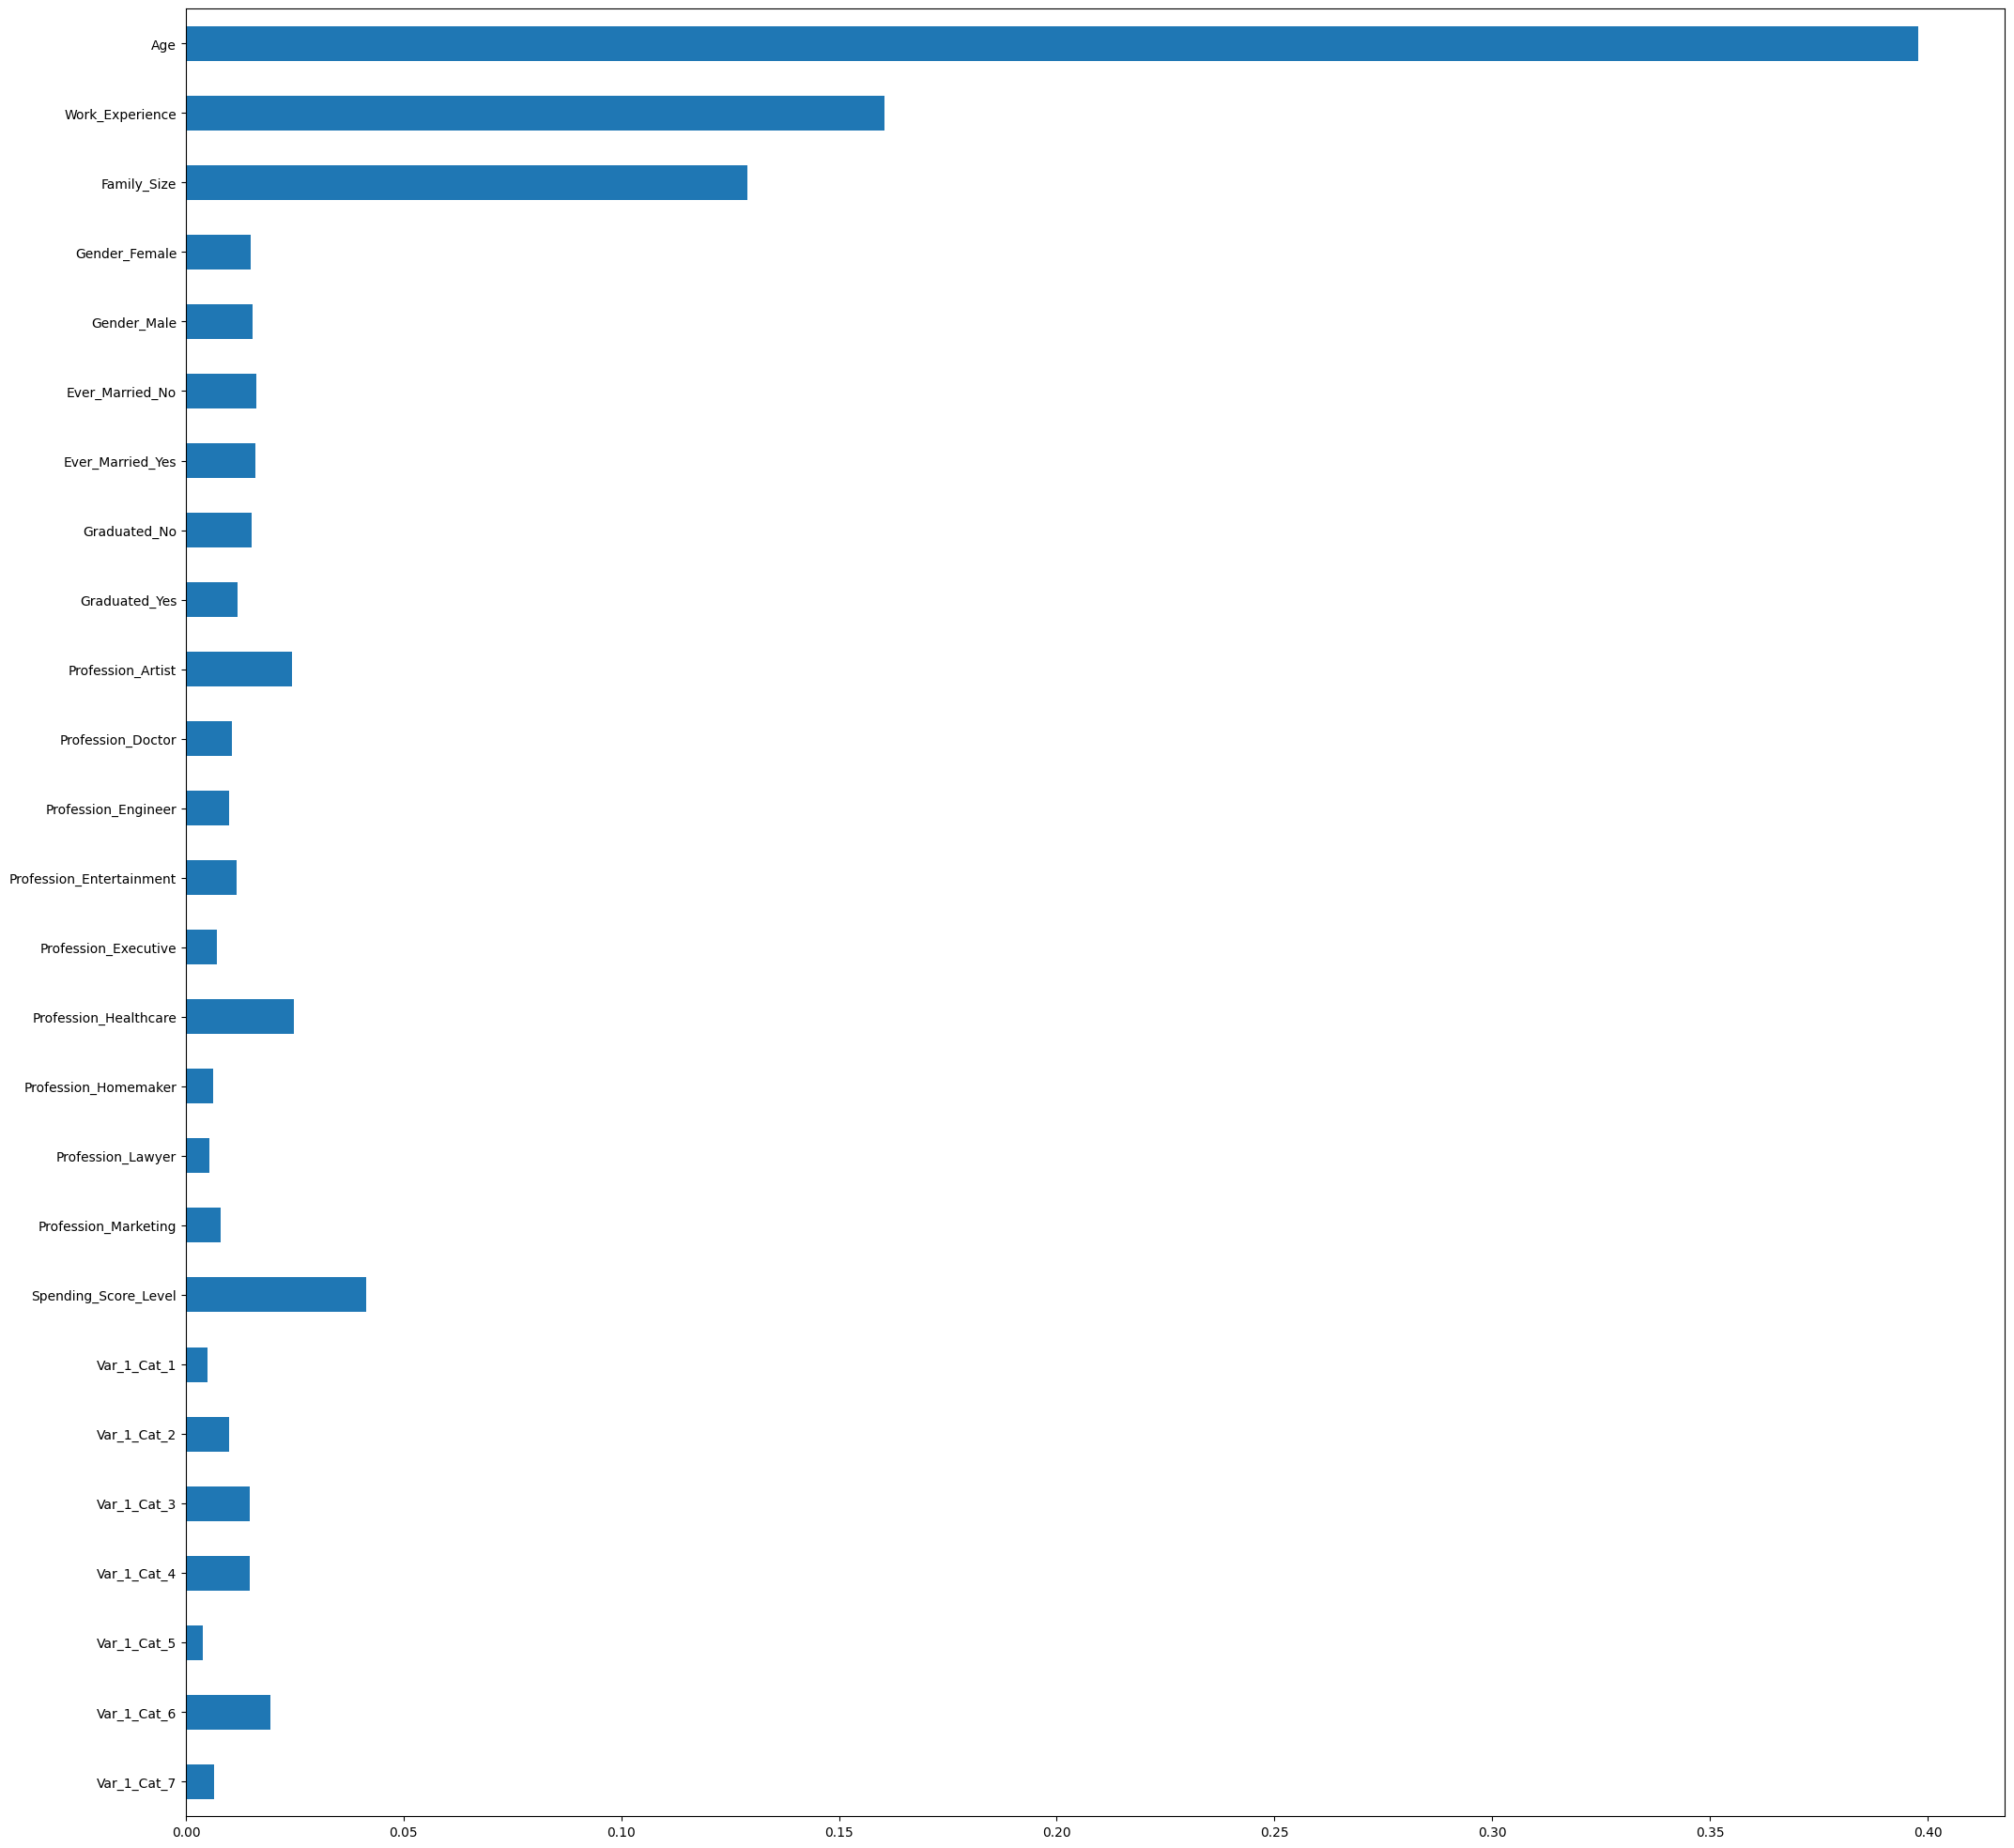

In [140]:
# Mengecek fitur paling penting pada data
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# Membagi data auto menjadi X dan y
X = auto.drop(["Segmentation_Level"], axis=1)
y = auto["Segmentation_Level"]

# Membuat model
model = RandomForestClassifier().fit(X, y)

# Membuat variabel importance guna melihat fitur paling penting
importance = model.feature_importances_

# Menselectkan semua fitur 
for i,v in enumerate(importance):
    print("Feature:{0:}, Score:{1:,.4f}".format(X.columns[i], v)) # {0:} akan digantikan dengan nama fitur yang diambil dari kolom ke-i pada dataframe X (X.columns[i]), sedangkan bagian {1:,.4f} akan digantikan dengan nilai skor pentingnya (v) dengan format desimal dengan 4 angka di belakang koma.
    
# Plotting fitur paling penting
pd.Series(model.feature_importances_[::-1], index=X.columns[::-1]).plot(kind="barh", figsize=(25,25)) # [::-1] : nilainya diurutkan secara terbalik

# 4. Data Modeling and Model Evaluation

## 4.1 Pembagian Data

In [141]:
# Membagi data menjadi fitur (X) dan target (y)
X = auto[["Age", "Family_Size", "Profession_Healthcare", "Profession_Entertainment", "Profession_Artist", "Ever_Married_Yes",
             "Graduated_No", "Spending_Score_Level"]]
y = auto["Segmentation_Level"]

# Melakukan data scaling untuk semua fitur
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0) # test sizenya = 75% (default), random_state=0: Parameter opsional yang digunakan untuk mengontrol pembagian data secara acak. Dengan mengatur random_state ke suatu nilai tertentu, pembagian data akan dilakukan secara deterministik, sehingga hasil pembagian akan konsisten setiap kali kode dieksekusi.

In [146]:
# Mengecek proporsi X train, X test, Y train dan Y test
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)

Jumlah baris dan kolom dari x_train adalah: (7792, 8) , sedangkan Jumlah baris dan kolom dari y_train adalah: (7792,)
Jumlah baris dan kolom dari x_test adalah: (2598, 8) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2598,)


## A. Logistic Regression

Testing degrees:
Train: Degree:1, Accuracy:0.449, Precision:0.430, Recall:0.449, F1:0.425
Test : Degree:1, Accuracy:0.457, Precision:0.446, Recall:0.457, F1:0.436
Train: Degree:2, Accuracy:0.479, Precision:0.473, Recall:0.479, F1:0.470
Test : Degree:2, Accuracy:0.471, Precision:0.465, Recall:0.471, F1:0.461
Train: Degree:3, Accuracy:0.491, Precision:0.484, Recall:0.491, F1:0.485
Test : Degree:3, Accuracy:0.472, Precision:0.463, Recall:0.472, F1:0.464

Linear Regression Intercept: [ 0.74879192 -0.72379641 -1.16146923  1.13647372]
Linear Regression Coefficients: [[-3.47022609e-05 -1.27712126e+00 -1.09315337e+00 -2.94474490e-01
   3.42462841e-01  5.07261114e-02  1.12245085e-01 -1.29246987e-02
  -6.45322486e-01  1.35846393e+00  5.46377585e-01  7.82735488e-01
   1.30594169e-01 -3.08866558e-01 -7.78415839e-01  1.79684226e-01
   1.19378985e-01  4.34274022e-01  1.21625038e-01 -8.64015963e-01
   3.39082071e-01  4.00711863e-01 -1.97538070e-01 -1.76975099e-01
  -2.94474490e-01  0.00000000e+00  0.

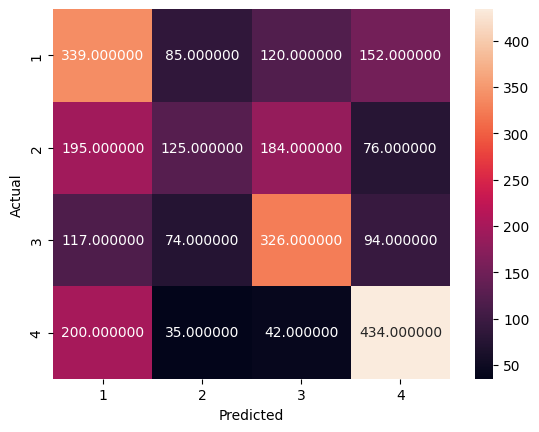

In [147]:
# Membuat model machine learning logistic regression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Mencoba dengan derajat polynomial yang berbeda
degrees = [1, 2, 3]
print("Testing degrees:")
for a in degrees:
    poly           = PolynomialFeatures(degree=a)
    X_train_degree = poly.fit_transform(X_train)
    X_test_degree  = poly.fit_transform(X_test)
    model_lr       = linear_model.LogisticRegression(max_iter=1000000000).fit(X_train_degree, y_train.values.ravel())
    y_preds_train  = model_lr.predict(X_train_degree)
    y_preds_test   = model_lr.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test  = accuracy_score(y_test, y_preds_test)
    precision_train= precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train   = recall_score(y_train, y_preds_train, average="weighted")
    recall_test    = recall_score(y_test, y_preds_test, average="weighted")
    f1_train       = f1_score(y_train, y_preds_train, average="weighted")
    f1_test        = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

# Memilih derajat polynomial terbaik
chosen_degree = 2
poly          = PolynomialFeatures(degree=chosen_degree)

# Menerapakan polynomial ke X train dan X test
X_train_degree = poly.fit_transform(X_train)
X_test_degree  = poly.fit_transform(X_test)

#Fitting model
model_lr = linear_model.LogisticRegression(max_iter=1000000000).fit(X_train_degree, y_train.values.ravel())
print(f"Linear Regression Intercept: {model_lr.intercept_}")
print(f"Linear Regression Coefficients: {model_lr.coef_}, \n")

# Mendapatkan hasil prediksi dan mengevaluasi model
y_preds_train   = model_lr.predict(X_train_degree)
y_preds_test    = model_lr.predict(X_test_degree)
accuracy_train  = accuracy_score(y_train, y_preds_train)
accuracy_test   = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test  = precision_score(y_test, y_preds_test, average="weighted")
recall_train    = recall_score(y_train, y_preds_train, average="weighted")
recall_test     = recall_score(y_test, y_preds_test, average="weighted")
f1_train        = f1_score(y_train, y_preds_train, average="weighted")
f1_test         = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen degree:")
print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# Memvisualisasikan hasil y_pred
X_degree    = poly.fit_transform(X_scaled)
y_preds_all = model_lr.predict(X_degree)
auto["Segmentation_Level_predicted"] = y_preds_all
auto.to_csv("model_lr.csv")

## B. Support Vector Machines

Train: Accuracy:0.473, Precision:0.468, Recall:0.473, F1:0.468
Test : Accuracy:0.464, Precision:0.455, Recall:0.464, F1:0.455

Confusion matrix:
Predicted    1    2    3    4
Actual                       
1          324  105  109  158
2          197  131  173   79
3          107   99  310   95
4          188   31   52  440, 



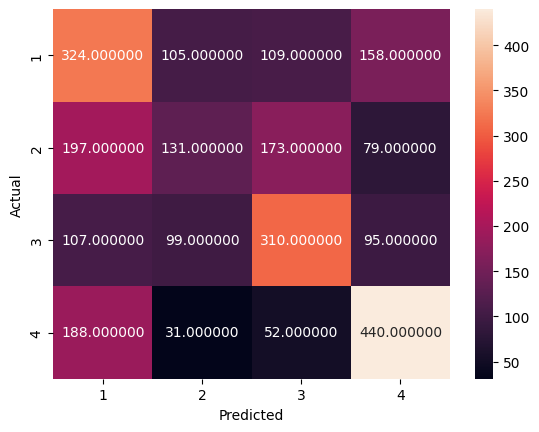

In [148]:
# Membuat model machine learning SVM
from sklearn import svm

# Fitting model
model_svm = svm.SVC().fit(X_train, y_train)

# Mendapatkan hasil prediksi dan mengevaluasi model
y_preds_train   = model_svm.predict(X_train)
y_preds_test    = model_svm.predict(X_test)
accuracy_train  = accuracy_score(y_train, y_preds_train)
accuracy_test   = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted") # average="weighted": Parameter opsional yang menentukan metode perhitungan nilai presisi. Pada syntax ini, digunakan metode weighted average yang akan memberikan bobot yang proporsional berdasarkan jumlah sampel di setiap kelas.
precision_test  = precision_score(y_test, y_preds_test, average="weighted")
recall_train    = recall_score(y_train, y_preds_train, average="weighted")
recall_test     = recall_score(y_test, y_preds_test, average="weighted")
f1_train        = f1_score(y_train, y_preds_train, average="weighted")
f1_test         = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test)) # Pada bagian ini terdapat placeholder {} yang akan digantikan dengan nilai yang diberikan pada parameter format().
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f') # fmt='0f': Parameter opsional yang menentukan format tampilan untuk nilai yang ditampilkan di dalam sel heatmap. Pada contoh ini, format yang digunakan adalah format angka desimal tanpa angka desimal, yaitu bilangan bulat.

# Memvisualisasikan hasil y_pred
y_preds_all = model_svm.predict(X_scaled)
auto["Segmentation_Level_predicted"] = y_preds_all
auto.to_excel("model_svm.xlsx")

## C. Naive Bayes

Train: Accuracy:0.432, Precision:0.422, Recall:0.432, F1:0.381
Test : Accuracy:0.436, Precision:0.477, Recall:0.436, F1:0.383

Confusion matrix:
Predicted    1  2    3    4
Actual                     
1          284  0  237  175
2          211  3  281   85
3          126  1  389   95
4          164  1   89  457, 



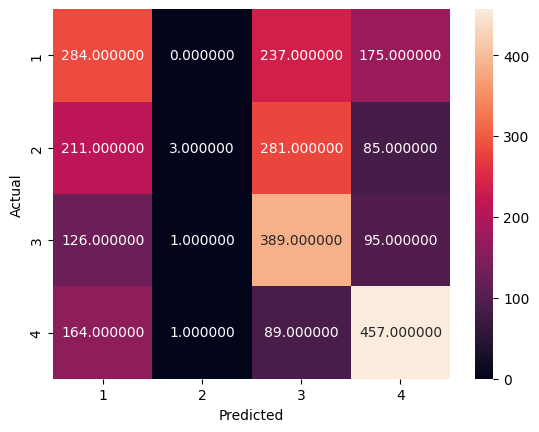

In [149]:
# Membuat model machine learning naive baiyes
from sklearn import naive_bayes

#Fitting model
model_nb = naive_bayes.MultinomialNB().fit(X_train, y_train)

#Mendapatkan hasil prediksi dan mengevaluasi model
y_preds_train   = model_nb.predict(X_train)
y_preds_test    = model_nb.predict(X_test)
accuracy_train  = accuracy_score(y_train, y_preds_train)
accuracy_test   = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test  = precision_score(y_test, y_preds_test, average="weighted")
recall_train    = recall_score(y_train, y_preds_train, average="weighted")
recall_test     = recall_score(y_test, y_preds_test, average="weighted")
f1_train        = f1_score(y_train, y_preds_train, average="weighted")
f1_test         = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# Memvisualisasikan hasil y_pred
y_preds_all = model_nb.predict(X_scaled)
auto["Segmentation_Level_predicted"] = y_preds_all
auto.to_excel("model_nb.xlsx")

## D. K-Nearest Neighbors

Testing neighbors:
Train: Neighbors:1, Accuracy:0.640, Precision:0.640, Recall:0.640, F1:0.640
Test : Neighbors:1, Accuracy:0.369, Precision:0.367, Recall:0.369, F1:0.367
Train: Neighbors:2, Accuracy:0.556, Precision:0.617, Recall:0.556, F1:0.549
Test : Neighbors:2, Accuracy:0.363, Precision:0.407, Recall:0.363, F1:0.362
Train: Neighbors:3, Accuracy:0.579, Precision:0.603, Recall:0.579, F1:0.580
Test : Neighbors:3, Accuracy:0.401, Precision:0.412, Recall:0.401, F1:0.398
Train: Neighbors:4, Accuracy:0.578, Precision:0.587, Recall:0.578, F1:0.578
Test : Neighbors:4, Accuracy:0.406, Precision:0.413, Recall:0.406, F1:0.406
Train: Neighbors:5, Accuracy:0.566, Precision:0.576, Recall:0.566, F1:0.566
Test : Neighbors:5, Accuracy:0.412, Precision:0.421, Recall:0.412, F1:0.412
Train: Neighbors:6, Accuracy:0.560, Precision:0.570, Recall:0.560, F1:0.559
Test : Neighbors:6, Accuracy:0.425, Precision:0.430, Recall:0.425, F1:0.423
Train: Neighbors:7, Accuracy:0.555, Precision:0.561, Recall:0.555, F1

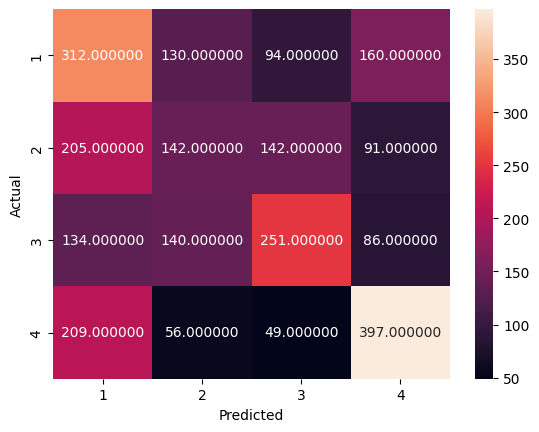

In [150]:
# Membuat model machine learning KNN
from sklearn import neighbors

# Mencoba beberapa neighbors
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print("Testing neighbors:")
for a in n_neighbors:
    model_knn       = neighbors.KNeighborsClassifier(n_neighbors=a).fit(X_train, y_train)
    y_preds_train   = model_knn.predict(X_train)
    y_preds_test    = model_knn.predict(X_test)
    accuracy_train  = accuracy_score(y_train, y_preds_train)
    accuracy_test   = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test  = precision_score(y_test, y_preds_test, average="weighted")
    recall_train    = recall_score(y_train, y_preds_train, average="weighted")
    recall_test     = recall_score(y_test, y_preds_test, average="weighted")
    f1_train        = f1_score(y_train, y_preds_train, average="weighted")
    f1_test         = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

# Memilih neigbor terbaik
chosen_neighbor = 10
model_knn       = neighbors.KNeighborsClassifier(n_neighbors=chosen_neighbor).fit(X_train, y_train)
y_preds_train   = model_knn.predict(X_train)
y_preds_test    = model_knn.predict(X_test)
accuracy_train  = accuracy_score(y_train, y_preds_train)
accuracy_test   = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test  = precision_score(y_test, y_preds_test, average="weighted")
recall_train    = recall_score(y_train, y_preds_train, average="weighted")
recall_test     = recall_score(y_test, y_preds_test, average="weighted")
f1_train        = f1_score(y_train, y_preds_train, average="weighted")
f1_test         = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen neighbors:")
print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# Memvisualisasikan hasil y_pred
y_preds_all = model_knn.predict(X_scaled)
auto["Segmentation_Level_predicted"] = y_preds_all
auto.to_excel("model_knn.xlsx")

## E. Random Forest

Testing depths:


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train: Depth:1, Accuracy:0.444, Precision:0.342, Recall:0.444, F1:0.385
Test : Depth:1, Accuracy:0.443, Precision:0.343, Recall:0.443, F1:0.386
Train: Depth:2, Accuracy:0.463, Precision:0.441, Recall:0.463, F1:0.435
Test : Depth:2, Accuracy:0.458, Precision:0.433, Recall:0.458, F1:0.430
Train: Depth:3, Accuracy:0.471, Precision:0.455, Recall:0.471, F1:0.451
Test : Depth:3, Accuracy:0.462, Precision:0.443, Recall:0.462, F1:0.441
Train: Depth:4, Accuracy:0.482, Precision:0.472, Recall:0.482, F1:0.470
Test : Depth:4, Accuracy:0.462, Precision:0.444, Recall:0.462, F1:0.447
Train: Depth:5, Accuracy:0.488, Precision:0.480, Recall:0.488, F1:0.479
Test : Depth:5, Accuracy:0.470, Precision:0.456, Recall:0.470, F1:0.458
Train: Depth:6, Accuracy:0.499, Precision:0.493, Recall:0.499, F1:0.491
Test : Depth:6, Accuracy:0.472, Precision:0.458, Recall:0.472, F1:0.460
Train: Depth:7, Accuracy:0.514, Precision:0.508, Recall:0.514, F1:0.506
Test : Depth:7, Accuracy:0.473, Precision:0.461, Recall:0.473, F

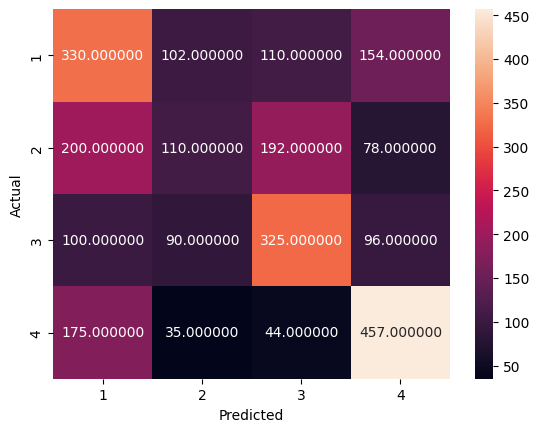

In [151]:
# Membuat model machine learning random faroest
from sklearn import ensemble

# Mencoba beberapa depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_rf        = ensemble.RandomForestClassifier(max_depth=a, random_state=0).fit(X_train, y_train)
    y_preds_train   = model_rf.predict(X_train)
    y_preds_test    = model_rf.predict(X_test)
    accuracy_train  = accuracy_score(y_train, y_preds_train)
    accuracy_test   = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test  = precision_score(y_test, y_preds_test, average="weighted")
    recall_train    = recall_score(y_train, y_preds_train, average="weighted")
    recall_test     = recall_score(y_test, y_preds_test, average="weighted")
    f1_train        = f1_score(y_train, y_preds_train, average="weighted")
    f1_test         = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

# Memilih depth terbaik
chosen_depth    = 5
model_rf        = ensemble.RandomForestClassifier(max_depth=chosen_depth, random_state=0).fit(X_train, y_train)
y_preds_train   = model_rf.predict(X_train)
y_preds_test    = model_rf.predict(X_test)
accuracy_train  = accuracy_score(y_train, y_preds_train)
accuracy_test   = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test  = precision_score(y_test, y_preds_test, average="weighted")
recall_train    = recall_score(y_train, y_preds_train, average="weighted")
recall_test     = recall_score(y_test, y_preds_test, average="weighted")
f1_train        = f1_score(y_train, y_preds_train, average="weighted")
f1_test         = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# Memvisualisasikan hasil y_pred
y_preds_all = model_rf.predict(X_scaled)
auto["Segmentation_Level_predicted"] = y_preds_all
auto.to_excel("model_rf.xlsx")

## F. XGBoost

Testing depths:
[18:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:1, Accuracy:0.481, Precision:0.473, Recall:0.481, F1:0.471
Test : Depth:1, Accuracy:0.473, Precision:0.462, Recall:0.473, F1:0.462
[18:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:2, Accuracy:0.500, Precision:0.493, Recall:0.500, F1:0.494
Test : Depth:2, Accuracy:0.478, Precision:0.471, Recall:0.478, F1:0.472
[18:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:3, Accuracy:0.515, Precision:0.509, Recall:0.515, F1:0.510
Test : Depth:3, Accuracy:0.469, Precision:0.461, Recall:0.469, F1:0.463
[18:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:4, Accuracy:0.547, Precision:0.541, Recall:0.547, F1:0.541
Test : Depth:4, Accuracy:0.472, Precision:0.463, Recall:0.472, F1:0.465
[18:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:5, Accuracy:0.572, Precision:0.567, Recall:0.572, F1:0.568
Test : Depth:5, Accuracy:0.470, Precision:0.462, Recall:0.470, F1:0.464
[18:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:6, Accuracy:0.604, Precision:0.601, Recall:0.604, F1:0.601
Test : Depth:6, Accuracy:0.459, Precision:0.451, Recall:0.459, F1:0.453
[18:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:7, Accuracy:0.638, Precision:0.635, Recall:0.638, F1:0.636
Test : Depth:7, Accuracy:0.439, Precision:0.433, Recall:0.439, F1:0.435
[18:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:8, Accuracy:0.658, Precision:0.655, Recall:0.658, F1:0.656
Test : Depth:8, Accuracy:0.436, Precision:0.429, Recall:0.436, F1:0.431
[18:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:9, Accuracy:0.677, Precision:0.675, Recall:0.677, F1:0.675
Test : Depth:9, Accuracy:0.435, Precision:0.429, Recall:0.435, F1:0.432
[18:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Train: Depth:10, Accuracy:0.685, Precision:0.683, Recall:0.685, F1:0.683
Test : Depth:10, Accuracy:0.433, Precision:0.427, Recall:0.433, F1:0.429

[18:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Chosen depth:
Train: Depth:2, Accuracy:0.500, Precision:0.493, Recall:0.500, F1:0.494
Test : Depth:2, Accuracy:0.478, Precision:0.471, Recall:0.478, F1:0.472

Confusion matrix:
Predicted    1    2    3    4
Actual                       
1          328  108   96  164
2          180  150  169   81
3          107   93  319   92
4          170   57   38  446, 



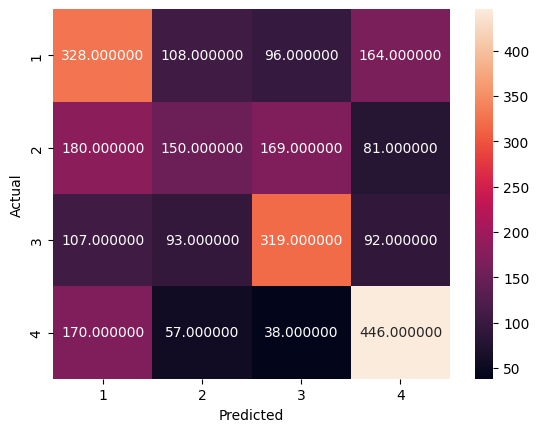

In [152]:
# Membuat model XGBoost
from xgboost import XGBClassifier

# Mencari depth terbaik
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_xgbc      = XGBClassifier(max_depth=a, objective="multi:softmax", num_class=4, random_state=42).fit(X_train, y_train)
    y_preds_train   = model_xgbc.predict(X_train)
    y_preds_test    = model_xgbc.predict(X_test)
    accuracy_train  = accuracy_score(y_train, y_preds_train)
    accuracy_test   = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test  = precision_score(y_test, y_preds_test, average="weighted")
    recall_train    = recall_score(y_train, y_preds_train, average="weighted")
    recall_test     = recall_score(y_test, y_preds_test, average="weighted")
    f1_train        = f1_score(y_train, y_preds_train, average="weighted")
    f1_test         = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

# Memilih depth terbaik
chosen_depth    = 2
model_xgbc      = XGBClassifier(max_depth=chosen_depth, objective="multi:softmax", num_class=4, random_state=0).fit(X_train, y_train)
y_preds_train   = model_xgbc.predict(X_train)
y_preds_test    = model_xgbc.predict(X_test)
accuracy_train  = accuracy_score(y_train, y_preds_train)
accuracy_test   = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test  = precision_score(y_test, y_preds_test, average="weighted")
recall_train    = recall_score(y_train, y_preds_train, average="weighted")
recall_test     = recall_score(y_test, y_preds_test, average="weighted")
f1_train        = f1_score(y_train, y_preds_train, average="weighted")
f1_test         = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# Memviasualisasikan hasil y_pred
y_preds_all = model_xgbc.predict(X_scaled)
auto["Segmentation_Level_predicted"] = y_preds_all
auto.to_excel("model_xgbc.xlsx")

# 5. Model Deployment

In [171]:
# Memasukkan nilai
age_input     = float(input("Enter the client´s age: "))
fam_input     = int(input("Enter the client´s family size: "))
prof_hc_input = str(input("Is the client´s profession Healthcare (Yes/No)? "))
if prof_hc_input == "Yes":
    prof_hc_input = 1
else:
    prof_hc_input = 0
prof_e_input      = str(input("Is the client´s profession Entertainment (Yes/No)? "))
if prof_e_input == "Yes":
    prof_e_input = 1
else:
    prof_e_input = 0
prof_a_input     = str(input("Is the client´s profession Artist (Yes/No)? "))
if prof_a_input == "Yes":
    prof_a_input = 1
else:
    prof_a_input = 0
married_input     = str(input("Has the client ever married (Yes/No)? "))
if married_input == "Yes":
    married_input = 1
else:
    married_input = 0
grad_n_input     = str(input("Is the client graduated (Yes/No)? "))
if grad_n_input == "Yes":
    grad_n_input = 0
else:
    grad_n_input = 1
spend_input      = int(input("Enter the client´s score level: "))

# Membuat dataframe baru untuk menampung input nilai yang telah dimasukkan sebelumnya
X_mod_dep = pd.DataFrame({"Age":[age_input], "Family_Size":[fam_input], "Profession_Healthcare":[prof_hc_input], 
                          "Profession_Entertainment":[prof_e_input], "Profession_Artist":[prof_a_input], 
                          "Ever_Married_Yes":[married_input], "Graduated_No":[grad_n_input], "Spending_Score_Level":[spend_input]})

# Memasukkan nilai fitur secara langsung tanpa input:
# X_mod_dep = pd.DataFrame({"Age":[79], "Family_Size":[1], "Profession_Healthcare":[0], 
#                           "Profession_Entertainment":[0], "Profession_Artist":[1], 
#                           "Ever_Married_Yes":[1], "Graduated_No":[0], "Spending_Score_Level":[3]})

# Menambahkan X_mod_dep ke dataframe X asli, sehingga kita dapat menskalakan semuanya
X_with_X_mode_dep = X.append(X_mod_dep) # append: DataFrame X ditambahkan dengan DataFrame X_mod_dep
X_with_X_mode_dep = X_with_X_mode_dep.reset_index(drop=True) # reset_index(drop=True) digunakan untuk mengatur ulang index dari DataFrame X_with_X_mode_dep. Dengan menggunakan drop=True, index asli yang ada sebelumnya akan dihapus dan index baru akan diberikan secara berurutan dari 0 hingga jumlah baris DataFrame.

# Scaling semua fitur 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_with_X_mode_dep)
X_scaled = pd.DataFrame(X_scaled)

# Memulihkan baris X_mod_dep dalam dataframe setelah scaling
X_mod_dep = X_scaled.tail(1) # tail(1) digunakan pada DataFrame X_scaled untuk mengambil baris terakhir. Dalam hal ini, angka 1 sebagai argumen berarti kita ingin mengambil satu baris terakhir dari DataFrame.

# Hasil prediksi
prediction = model_xgbc.predict(X_mod_dep)
if prediction == 1:
    prediction_answer = "A"
if prediction == 2:
    prediction_answer = "B"
if prediction == 3:
    prediction_answer = "C"
if prediction == 4:
    prediction_answer = "D"

print("")
print(f"This client´s predicted Segmentation is: {prediction_answer}.")


This client´s predicted Segmentation is: C.


C:\Users\User\AppData\Local\Temp\ipykernel_8260\3062108334.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_with_X_mode_dep = X.append(X_mod_dep) # append: DataFrame X ditambahkan dengan DataFrame X_mod_dep


In [173]:
X_with_X_mode_dep.head()

,Age,Family_Size,Profession_Healthcare,Profession_Entertainment,Profession_Artist,Ever_Married_Yes,Graduated_No,Spending_Score_Level
0,22.0,4.0,1,0,0,0,1,1
1,38.0,3.0,0,0,0,1,0,2
2,67.0,1.0,0,0,0,1,0,1
3,67.0,2.0,0,0,0,1,0,3
4,40.0,6.0,0,1,0,1,0,3


In [174]:
X_scaled.head()

,0,1,2,3,4,5,6,7
0,0.056338,0.375,1.0,0.0,0.0,0.0,1.0,0.0
1,0.281690,0.250,0.0,0.0,0.0,1.0,0.0,0.5
2,0.690141,0.000,0.0,0.0,0.0,1.0,0.0,0.0
3,0.690141,0.125,0.0,0.0,0.0,1.0,0.0,1.0
4,0.309859,0.625,0.0,1.0,0.0,1.0,0.0,1.0


In [176]:
X_mod_dep.head()

,0,1,2,3,4,5,6,7
10390,0.71831,0.5,1.0,0.0,0.0,1.0,0.0,1.0


# 6. Conclusion

1. Proyek ini melibatkan serangkaian proses mulai dari mendefinisikan tujuan bisnis hingga menyajikan hasil dengan menggunakan 6 algoritma berbeda untuk memprediksi klasifikasi segmentasi pelanggan. <br>

2. Model yang dipilih dalam proyek ini adalah XGBoost, karena memiliki tingkat akurasi yang paling tinggi dibandingkan dengan model-model lainnya.<br>

3. Model XGBoost terdapat keterbatasan. Untuk mendapatkan model yang lebih baik, diperlukan lebih banyak data pelanggan yang tersedia.<br>